In [1]:
# imports

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats

# custom imports
import acquire
import prepare
import explore as e
import modelling as m

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# set options to display all columns
pd.options.display.max_columns = None

# set seed
seed =42

## Acquire

In [3]:
# acquire telco data using function from acquire module
telco_original = acquire.get_telco_data()

In [4]:
# take a look at the data
telco_original.head(3)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [5]:
# take look to check null and dtypes. 
telco_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## Prepare

### Clean Data

In [6]:
# acquire clean data using function from prepare module
telco = prepare.prep_telco(telco_original)

In [7]:
# take a look at the data
telco.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,gender_male,partner_yes,dependents_yes,phone_service_yes,paperless_billing_yes,churn_yes,multiple_lines_no,multiple_lines_no phone service,multiple_lines_yes,online_security_no,online_security_no internet service,online_security_yes,online_backup_no,online_backup_no internet service,online_backup_yes,device_protection_no,device_protection_no internet service,device_protection_yes,tech_support_no,tech_support_no internet service,tech_support_yes,streaming_tv_no,streaming_tv_no internet service,streaming_tv_yes,streaming_movies_no,streaming_movies_no internet service,streaming_movies_yes,internet_service_type_dsl,internet_service_type_fiber optic,internet_service_type_none,contract_type_month-to-month,contract_type_one year,contract_type_two year,payment_type_bank transfer (automatic),payment_type_credit card (automatic),payment_type_electronic check,payment_type_mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [8]:
# take a look to check null and data types. 
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   gender                                  7043 non-null   object 
 2   senior_citizen                          7043 non-null   int64  
 3   partner                                 7043 non-null   object 
 4   dependents                              7043 non-null   object 
 5   tenure                                  7043 non-null   int64  
 6   phone_service                           7043 non-null   object 
 7   multiple_lines                          7043 non-null   object 
 8   online_security                         7043 non-null   object 
 9   online_backup                           7043 non-null   object 
 10  device_protection                       7043 non-null   obje

In [9]:
# create list of categorical data

# df1 = telco.select_dtypes(include='object').drop(columns='customer_id')
# cat_cols= df1.columns.tolist()
# cat_cols.append('senior_citizen')
# cat_cols

In [10]:
# create list of  numerical data

# num_cols = ['tenure', 'monthly_charges', 'total_charges']

###  Data split

In [11]:
#  split data using function from prepare module
train, validate, test = prepare.train_validate_test_split(telco, 'churn')

In [12]:
# take a look at the shape of data
train.shape, validate.shape, test.shape

((3943, 58), (1691, 58), (1409, 58))

In [13]:
# take a look at the train data 
train.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,gender_male,partner_yes,dependents_yes,phone_service_yes,paperless_billing_yes,churn_yes,multiple_lines_no,multiple_lines_no phone service,multiple_lines_yes,online_security_no,online_security_no internet service,online_security_yes,online_backup_no,online_backup_no internet service,online_backup_yes,device_protection_no,device_protection_no internet service,device_protection_yes,tech_support_no,tech_support_no internet service,tech_support_yes,streaming_tv_no,streaming_tv_no internet service,streaming_tv_yes,streaming_movies_no,streaming_movies_no internet service,streaming_movies_yes,internet_service_type_dsl,internet_service_type_fiber optic,internet_service_type_none,contract_type_month-to-month,contract_type_one year,contract_type_two year,payment_type_bank transfer (automatic),payment_type_credit card (automatic),payment_type_electronic check,payment_type_mailed check
4604,6490-FGZAT,Male,0,No,No,6,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.65,109.30,No,None,Month-to-month,Mailed check,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
4051,5707-ORNDZ,Male,1,No,No,9,Yes,Yes,Yes,No,No,No,No,No,No,54.55,494.05,Yes,DSL,Month-to-month,Electronic check,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
5159,7252-NTGSS,Female,0,No,No,1,Yes,No,No,No,No,No,No,No,No,45.15,45.15,No,DSL,Month-to-month,Mailed check,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


## Explore

In [14]:
# take a look at data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6377
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             3943 non-null   object 
 1   gender                                  3943 non-null   object 
 2   senior_citizen                          3943 non-null   int64  
 3   partner                                 3943 non-null   object 
 4   dependents                              3943 non-null   object 
 5   tenure                                  3943 non-null   int64  
 6   phone_service                           3943 non-null   object 
 7   multiple_lines                          3943 non-null   object 
 8   online_security                         3943 non-null   object 
 9   online_backup                           3943 non-null   object 
 10  device_protection                       3943 non-null   o

#### Explore categorical variables

In [15]:
# create a list of categorical variables
cat_cols = e.cat_cols(train)
cat_cols

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type',
 'senior_citizen']

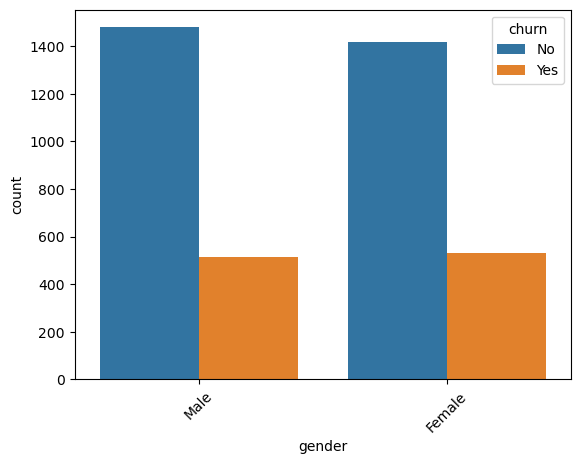

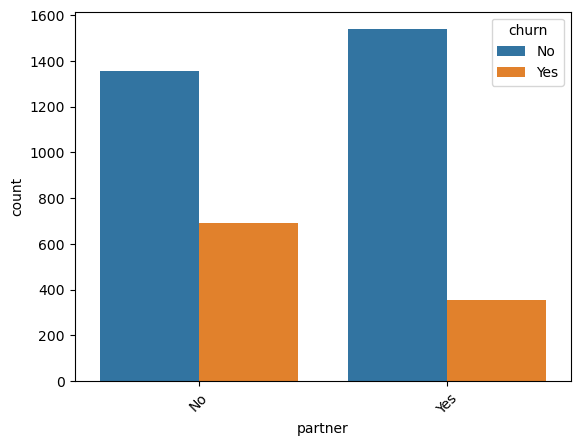

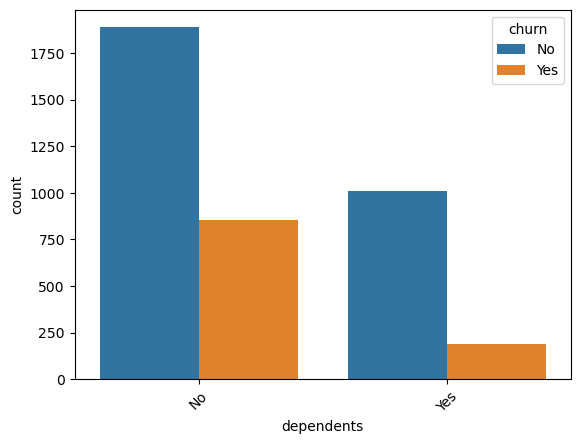

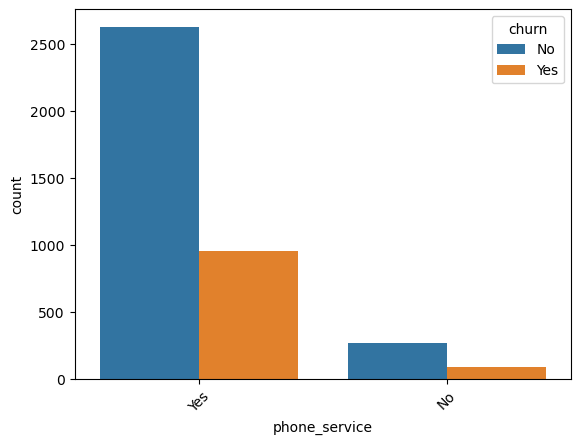

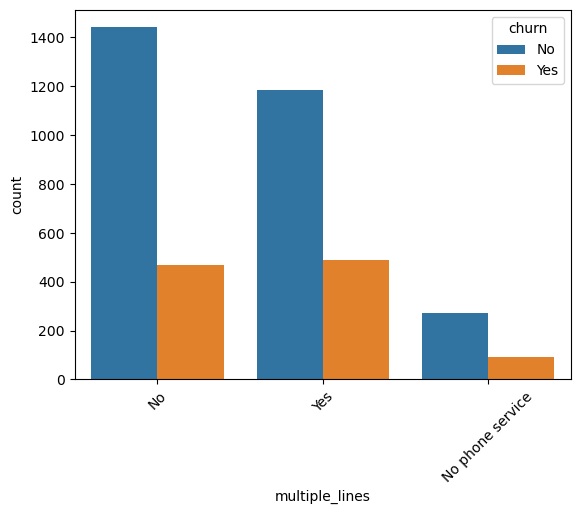

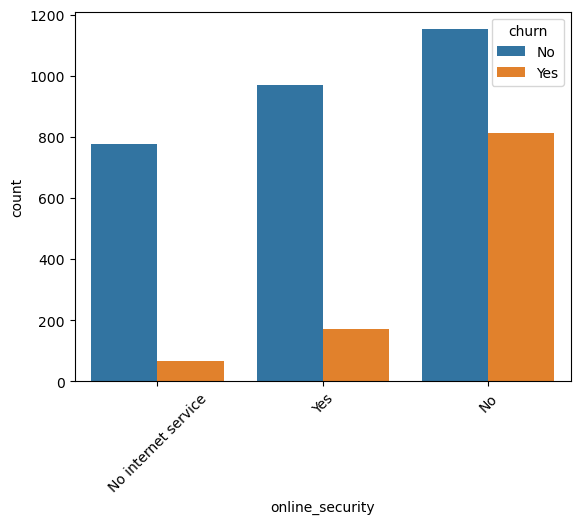

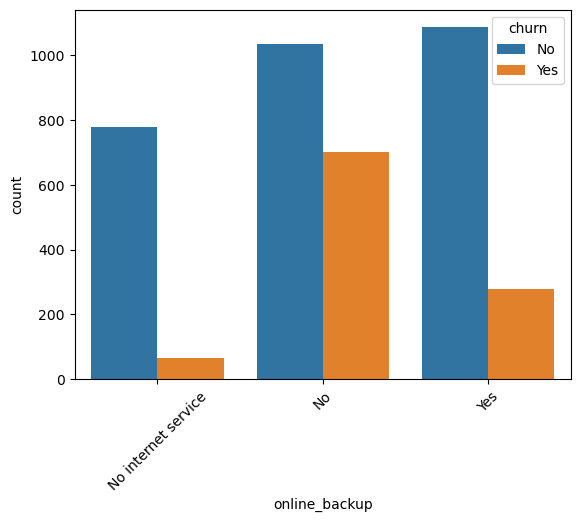

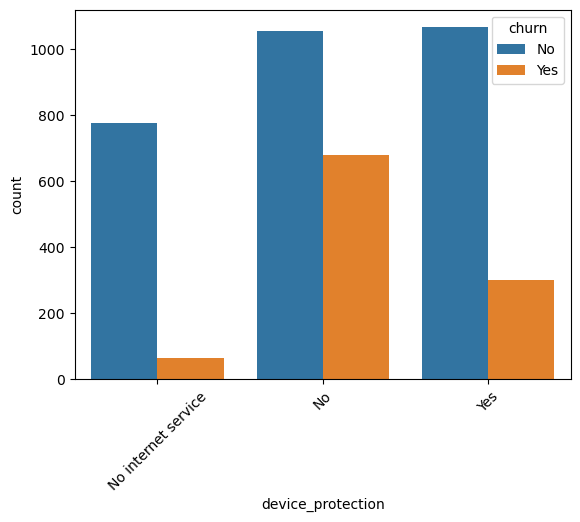

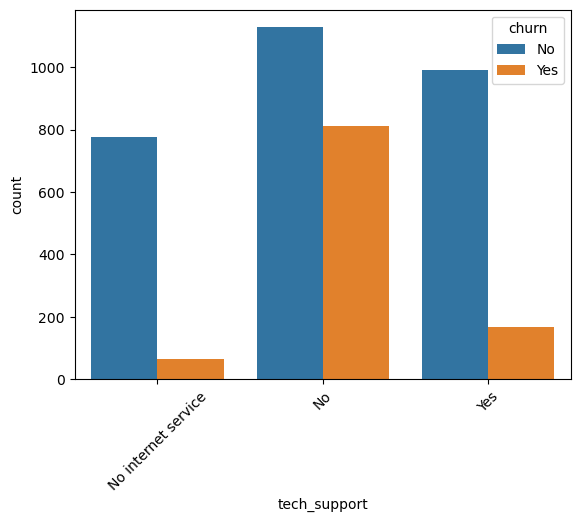

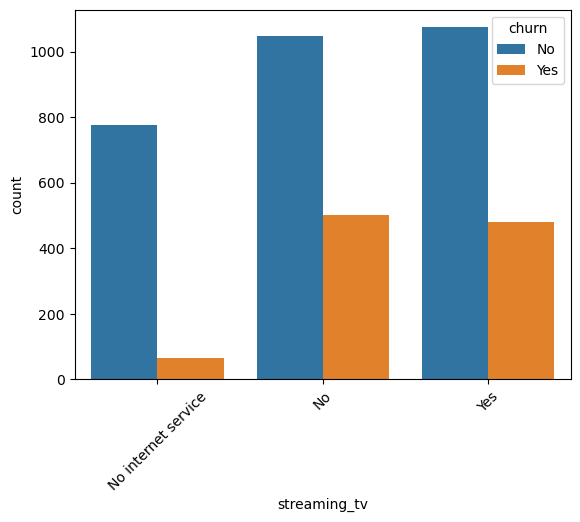

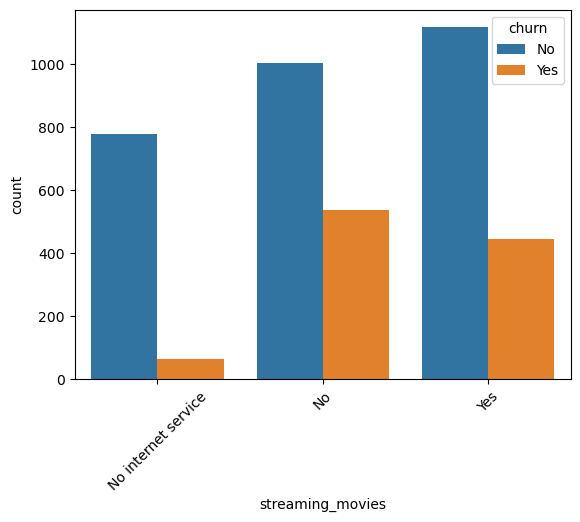

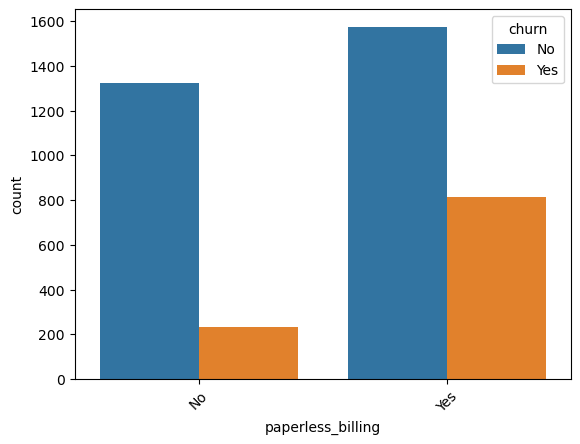

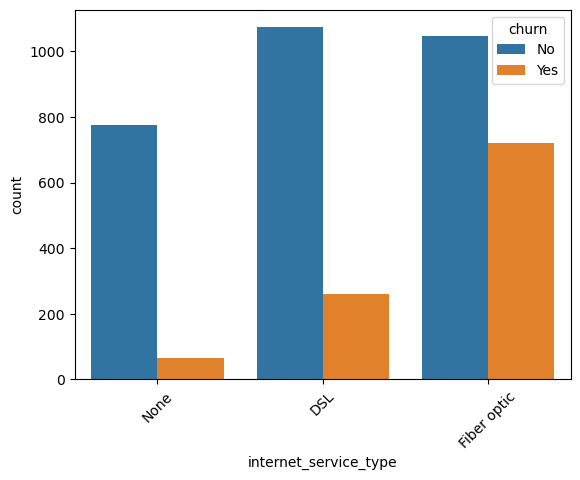

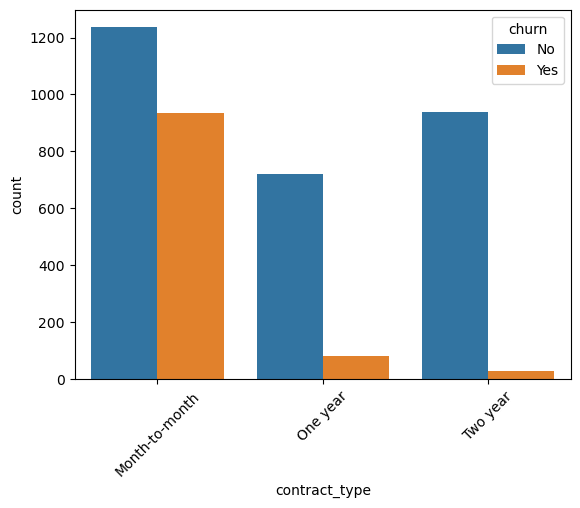

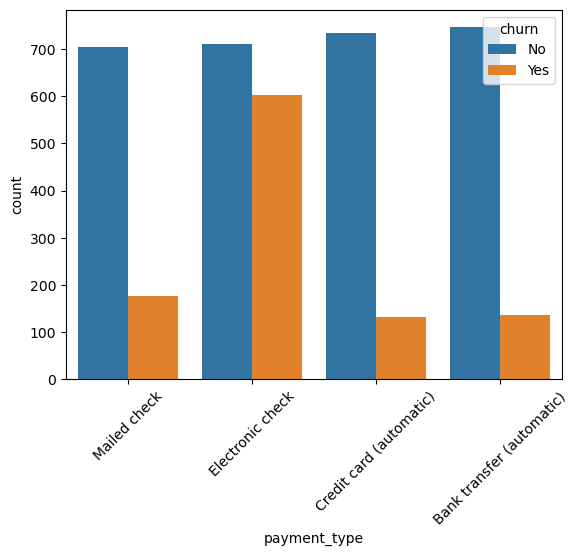

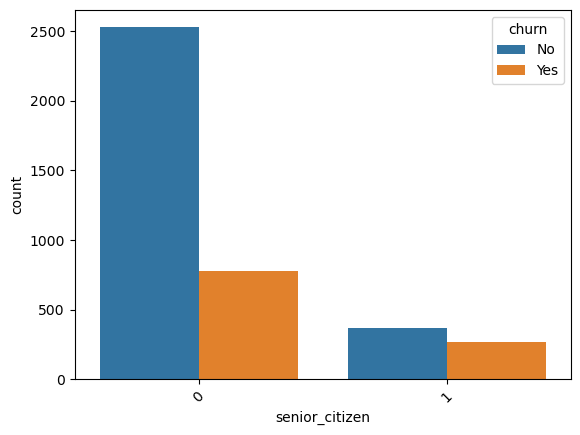

In [16]:
# visualization of categorical variables
e.vis_countplot_cat(cat_cols,train)

it looks like gender does not play significant role in customer churn. Male churn and female churn looks around same.


In [17]:
# chi-Square test on categorical variables
e.chi_test(cat_cols, train)

gender: 
Null Hypothesis: gender and churn are independent

Alternative Hypothesis: gender and churn are dependent

chi^2 = 1.2032249809003344
p     = 0.2726780599953642

We fail to reject null hypothesis
There appears to be no significant relationship between gender and churn.
--------------------------------------------------------------------------------------------

partner: 
Null Hypothesis: partner and churn are independent

Alternative Hypothesis: partner and churn are dependent

chi^2 = 114.82619678090427
p     = 8.590621285343115e-27

We reject null hypothesis
There exists some relationship between partner and churn.
--------------------------------------------------------------------------------------------

dependents: 
Null Hypothesis: dependents and churn are independent

Alternative Hypothesis: dependents and churn are dependent

chi^2 = 100.06930009717803
p     = 1.47156924105124e-23

We reject null hypothesis
There exists some relationship between dependents and churn.


The results from Chi-square support our conclusion from the graph. From Chi-squre result we can say that there is no significant relationship between gender with churn and phone service with churn. Further we can see higher chi^2 score of online security, online backup, device protection, tech support, internet service, contract type, and payment type which lets us assume that those attributes are the main driving attributes of churn.

#### Explore numerical variables

In [18]:
# create a list of numerical variables
num_cols = e.num_cols(train)
num_cols

['tenure', 'monthly_charges', 'total_charges']

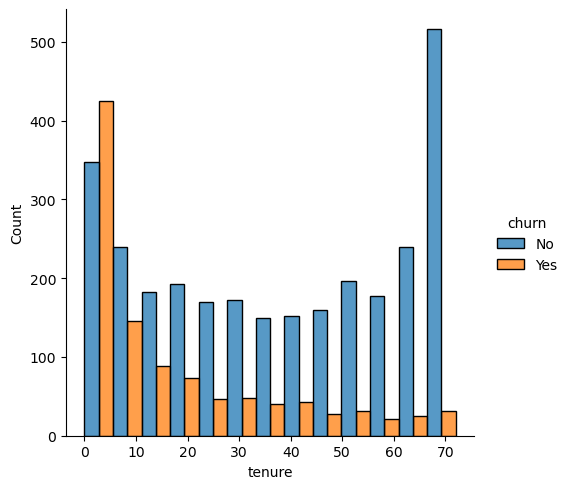

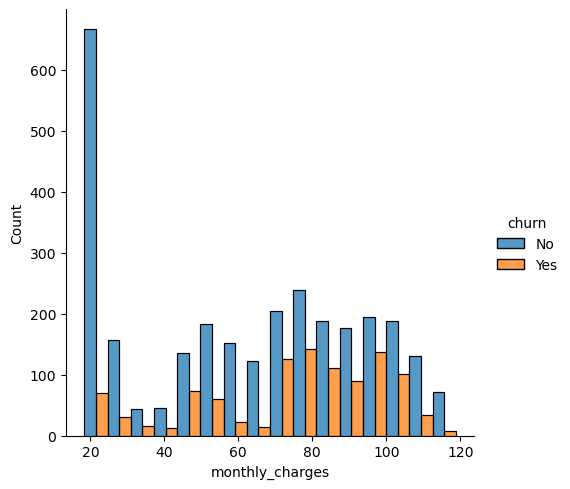

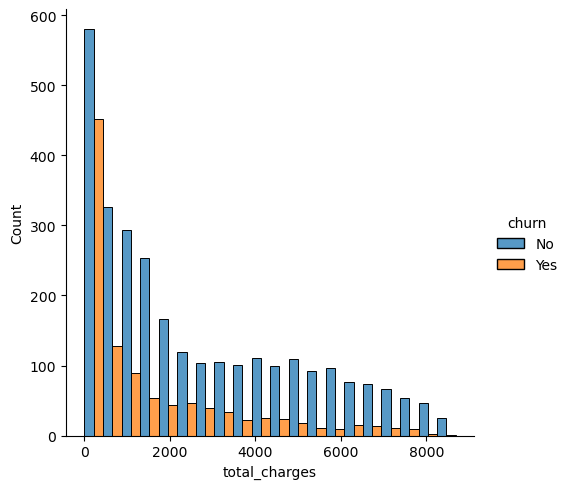

In [19]:
# visualization of numeical vairables
e.vis_distplot_num(num_cols, train)

- customers churn is high in initial months
- customers who pays higher monthly charges seems to churn in higher number
- customers churn is higher when total charges is low. 


In [20]:
# visualization of numeical vairables

# for col in num_cols:
#     sns.displot( x = col, hue='churn', data=train, element="step")
#     plt.show()

In [21]:
# visualization of numeical vairables

# for col in num_cols:
#     sns.displot( x = col, hue='churn', data=train, multiple="stack")
#     plt.show()

In [22]:
# independent t-test of numerical variables
e.ind_t_test_greater(num_cols, train)

Null Hypothesis: mean of tenure of customers who churned is less or equal to mean of tenure of customers who haven't churned

Alternative Hypothesis: mean of tenure of customers who churn is greater than mean of tenure of customers who haven't churned

t: -26.876562843132383
p: 2.205596766928676e-138

We fail to reject null hypothesis

It appears that mean of tenure of customers who churned is less or equal to mean of tenure of customers who haven't churned
--------------------------------------------------------------------------------------------

Null Hypothesis: mean of monthly_charges of customers who churned is less or equal to mean of monthly_charges of customers who haven't churned

Alternative Hypothesis: mean of monthly_charges of customers who churn is greater than mean of monthly_charges of customers who haven't churned

t: 12.868714695514663
p: 1.1731781534733783e-36

we reject null hypothesis

mean of monthly_charges of customers who churn is greater than mean of monthly_

Independet t-test (1 tail, a significantly larger) supports our conclusion drawn from the graph.

### Exlporation of encoded multivariate categorical variables

In [23]:
# create list of encoded categorical variables
encoded_cat_cols = [ 'online_security_no','online_security_no internet service',
 'online_security_yes', 'online_backup_no', 'online_backup_no internet service','online_backup_yes', 'device_protection_no','device_protection_no internet service',
 'device_protection_yes', 'tech_support_no','tech_support_no internet service','tech_support_yes', 'internet_service_type_dsl',
 'internet_service_type_fiber optic','internet_service_type_none',
 'contract_type_month-to-month', 'contract_type_one year','contract_type_two year',
 'payment_type_bank transfer (automatic)','payment_type_credit card (automatic)','payment_type_electronic check',
 'payment_type_mailed check']

In [24]:
# run chi-squre test on encoded categorical variables
e.chi_test(encoded_cat_cols, train)

online_security_no: 
Null Hypothesis: online_security_no and churn are independent

Alternative Hypothesis: online_security_no and churn are dependent

chi^2 = 436.9947161902369
p     = 4.8810902633517e-97

We reject null hypothesis
There exists some relationship between online_security_no and churn.
--------------------------------------------------------------------------------------------

online_security_no internet service: 
Null Hypothesis: online_security_no internet service and churn are independent

Alternative Hypothesis: online_security_no internet service and churn are dependent

chi^2 = 193.0915688400345
p     = 6.722583739028419e-44

We reject null hypothesis
There exists some relationship between online_security_no internet service and churn.
--------------------------------------------------------------------------------------------

online_security_yes: 
Null Hypothesis: online_security_yes and churn are independent

Alternative Hypothesis: online_security_yes and chur

The result helps us to find encoded categorical variables which have strong relation with the churn

In [25]:
# encoded varibles that are the main driver of churn
encoded = ['tenure', 'monthly_charges', 'total_charges','online_security_no',  'online_backup_no', 'tech_support_no', 'internet_service_type_fiber optic', 
'contract_type_month-to-month', 'contract_type_two year','payment_type_electronic check']

In [26]:
# create labels 
X_train = train[encoded]
y_train = train.churn_yes

X_validate = validate[encoded]
y_validate = validate.churn_yes

X_test = test[encoded]
y_test = test.churn_yes

#### Baseline Prediction

In [27]:
# calculate baseline accuracy

# assign most common class to baseline
baseline = y_train.mode()

# compare baseline with y_train class to get most common class
matches_baseline_prediction = (y_train == 0)

# get mean
baseline_accuracy = matches_baseline_prediction.mean()

# print baseline accuracy
print(f"Baseline accuracy: {(baseline_accuracy)}") 

Baseline accuracy: 0.7347197565305605


## Modeling

Use different model with various hyperparameters to find the best model

### Model 1: Decision Tree

In [28]:
# using Decision tree model with max_depth from 1 to 24 to find best model

# create an empty list to append output
metrics = []

for i in range(1,25):
    # create model
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    
    # fit the model to training data
    tree.fit(X_train, y_train)
    
    # accuracy score on train
    accuracy_train = tree.score(X_train,y_train)
    
    # accuracy score on validate
    accuracy_validate = tree.score(X_validate,y_validate)
    
    output = {'max_depth': i,
             'train_accuracy': accuracy_train,
             'validate_accuracy': accuracy_validate,
             }
    metrics.append(output)
    
df1 = pd.DataFrame(metrics)
df1['difference'] = df1.train_accuracy - df1.validate_accuracy
# df1.head()

In [29]:
# df1.sort_values(by=['validate_accuracy'], ascending=False).head(10)

In [30]:
# list the validate accuracy on descending order
df1.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(10)

,max_depth,train_accuracy,validate_accuracy,difference
5,6,0.820695,0.783560,0.037135
4,5,0.812072,0.780603,0.031469
6,7,0.831347,0.780603,0.050743
2,3,0.794826,0.780012,0.014814
3,4,0.804464,0.777646,0.026817
7,8,0.845042,0.771141,0.073901
8,9,0.863302,0.762862,0.100440
9,10,0.886127,0.762862,0.123265
1,2,0.763885,0.756357,0.007528
11,12,0.929242,0.755174,0.174067


Max_depth of 6 performs better on out-of-sample data(validate). Max_depth of  6 is the best model. 
- decision_tree_train_accuracy = 0.820695
- decision_tree_validate_accuracy = 0.783560

#### Model2: Random forest

In [31]:
# using Random Forest model with min_samples_leaf from 1 to 24 to find best model


# create an empty list to append output
metrics = []
for i in range(1, 25):
    
    # create model
    rf = RandomForestClassifier(min_samples_leaf =i, random_state=42) 
    
    # fit the model to training data
    rf.fit(X_train, y_train)
    
    # accuracy score on train
    accuracy_train = rf.score(X_train,y_train)
    
    # accuracy score on validate
    accuracy_validate = rf.score(X_validate,y_validate)
    
    output = {'min_samples_leaf ': i,
             'train_accuracy': accuracy_train,
             'validate_accuracy': accuracy_validate,
             }
    metrics.append(output)
    
df2 = pd.DataFrame(metrics)
df2['difference'] = df2.train_accuracy - df2.validate_accuracy
# df2.head()

In [32]:
# list the validate accuracy on descending order
df1.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(10)

,max_depth,train_accuracy,validate_accuracy,difference
5,6,0.820695,0.783560,0.037135
4,5,0.812072,0.780603,0.031469
6,7,0.831347,0.780603,0.050743
2,3,0.794826,0.780012,0.014814
3,4,0.804464,0.777646,0.026817
7,8,0.845042,0.771141,0.073901
8,9,0.863302,0.762862,0.100440
9,10,0.886127,0.762862,0.123265
1,2,0.763885,0.756357,0.007528
11,12,0.929242,0.755174,0.174067


Min_samples_leaf of 10 performs best on out-of sample dataset (validate). Min_samples_leaf of  is the best model.
- random_forest_tree_train_accuracy = 0.839462
- random_forest_tree_validate_accuracy = 0.797753

#### Model3: KNN

In [33]:
# using KNN model with n_neighbors from 1 to 24 to find best model


# create an empty list to append output
metrics = []
for i in range(1, 25):
    
    # create model
    knn = KNeighborsClassifier(n_neighbors=i) 
    
    # fit the model to training data
    knn.fit(X_train, y_train)
    
    # accuracy score on train
    accuracy_train = knn.score(X_train,y_train)
    
    # accuracy score on validate
    accuracy_validate = knn.score(X_validate,y_validate)
    
    output = {'n_neighbors': i,
             'train_accuracy': accuracy_train,
             'validate_accuracy': accuracy_validate,
             }
    metrics.append(output)
    
df3 = pd.DataFrame(metrics)
df3['difference'] = df3.train_accuracy - df3.validate_accuracy
#df3.head()

In [34]:
# list the validate accuracy on descending order
df1.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(10)

,max_depth,train_accuracy,validate_accuracy,difference
5,6,0.820695,0.783560,0.037135
4,5,0.812072,0.780603,0.031469
6,7,0.831347,0.780603,0.050743
2,3,0.794826,0.780012,0.014814
3,4,0.804464,0.777646,0.026817
7,8,0.845042,0.771141,0.073901
8,9,0.863302,0.762862,0.100440
9,10,0.886127,0.762862,0.123265
1,2,0.763885,0.756357,0.007528
11,12,0.929242,0.755174,0.174067


n_neighoburs 10 performs best on validate data. n_neighbors 10 is  is the optimal model.
- knn_train_accuracy = 0.813847
- knn_validate_accuracy = 0.776464


#### Model4: Logistic Regression

In [35]:
seed = 42


# using Logistic regression model with different values of hyperparameter c to find best model


# create an empty list to append output
metrics = []

# create model1 of logistic regression
logit1 = LogisticRegression(C = 1, random_state=seed, solver='liblinear' )
logit2 = LogisticRegression(C = 0.1, random_state=seed, solver='liblinear')


cols = [logit1, logit2]

for col in cols : 
    
    # fit model
    col.fit(X_train, y_train)

    # fit the model to training data
    col.fit(X_train, y_train)
    
    # accuracy score on train
    accuracy_train = col.score(X_train,y_train)

    # accuracy score on validate
    accuracy_validate =col.score(X_validate,y_validate)
    
    output = {'model': col,
             'train_accuracy': accuracy_train,
             'validate_accuracy': accuracy_validate,
             }
    metrics.append(output)
    
df4 = pd.DataFrame(metrics)
df4['difference'] = df3.train_accuracy - df3.validate_accuracy
# df4

In [36]:
# list the validate accuracy on descending order
df4.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(10)

,model,train_accuracy,validate_accuracy,difference
0,"LogisticRegression(C=1, random_state=42, solve...",0.804717,0.790656,0.279965
1,"LogisticRegression(C=0.1, random_state=42, sol...",0.808521,0.788882,0.104746


logit1 model performs best on validate data. logit1 model is is the optimal model.
- lrg_train_accuracy = 0.804717
- lrg_validate_accuracy = 0.790656
	

In [37]:
# result from best model of decision tree model using function form explore.py
m.get_decision_tree(X_train, X_validate, y_train, y_validate)

Decision Tree Accuracy score on train set: 0.8206949023586102
Decsion Tee Accuracy score on validate set: 0.7835600236546422


In [38]:
# result from best model of random forest model using function form explore.py
m.get_random_forest(X_train, X_validate, y_train, y_validate)

Random Forest Accuracy score on train set: 0.8394623383210753
Random Forest score on validate set: 0.797752808988764


In [39]:
# result from best model of KNN model using function form explore.py
m.get_knn(X_train, X_validate, y_train, y_validate)

KNN Accuracy score on train set: 0.8138473243723053
KNN Accuracy score on validate set: 0.7764636309875813


In [40]:
# result from best model of logistic regrssion model using function form explore.py
m.get_logistic_regression(X_train, X_validate, y_train, y_validate)

Logistic Regression Accuracy score on train set: 0.8047172203905656
Logistic Regression Accuracy score on validate set: 0.7906564163217031


In [41]:
# print accuracy score of test data and give data frame with predictions
result = m.get_logistic_regression_test(X_train, X_validate, y_train, y_validate, X_test, y_test,test)

Logistic Regression Accuracy score on test set: 0.7906316536550745


In [42]:
result.head()

,customer_id,probability,prediction
455,0668-OGMHD,0.245884,0
2301,3292-PBZEJ,0.563252,1
2255,3223-DWFIO,0.743790,1
4527,6377-KSLXC,0.225876,0
3812,5360-XGYAZ,0.004912,0


In [43]:
# outout results into csv
result.to_csv('predictions.csv', index=False)